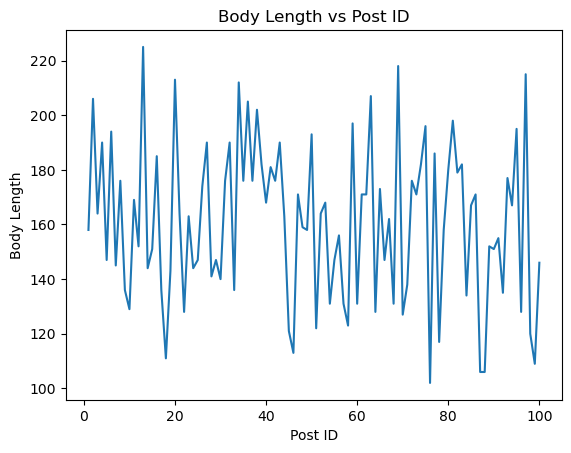

Aggregated Data by User ID:
{1: [{'userId': 1, 'id': 1, 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit', 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}, {'userId': 1, 'id': 2, 'title': 'qui est esse', 'body': 'est rerum tempore vitae\nsequi sint nihil reprehenderit dolor beatae ea dolores neque\nfugiat blanditiis voluptate porro vel nihil molestiae ut reiciendis\nqui aperiam non debitis possimus qui neque nisi nulla'}, {'userId': 1, 'id': 3, 'title': 'ea molestias quasi exercitationem repellat qui ipsa sit aut', 'body': 'et iusto sed quo iure\nvoluptatem occaecati omnis eligendi aut ad\nvoluptatem doloribus vel accusantium quis pariatur\nmolestiae porro eius odio et labore et velit aut'}, {'userId': 1, 'id': 4, 'title': 'eum et est occaecati', 'body': 'ullam et saepe reiciendis voluptatem adipisci\nsit amet autem assumenda p

In [1]:
import requests
import redis
import json
import matplotlib.pyplot as plt

def fetch_json_from_api(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print("Failed to fetch JSON from API:", response.status_code)
        return None

def insert_json_into_redis(json_data, redis_client, key):
    serialized_data = json.dumps(json_data)
    redis_client.set(key, serialized_data)

def process_data(json_data):
    # Example: Plotting data using matplotlib
    x = [item['id'] for item in json_data]  # Assuming 'id' field is present in your JSON data
    y = [len(item['body']) for item in json_data]  # Assuming 'body' field is present and taking its length
    plt.plot(x, y)
    plt.xlabel('Post ID')
    plt.ylabel('Body Length')
    plt.title('Body Length vs Post ID')
    plt.show()

def aggregate_by_user(json_data):
    user_data = {}
    for item in json_data:
        user_id = item['userId']
        if user_id not in user_data:
            user_data[user_id] = []
        user_data[user_id].append(item)
    return user_data

def search_by_title(json_data, keyword):
    search_results = []
    for item in json_data:
        if keyword.lower() in item['title'].lower():
            search_results.append(item)
    return search_results

def main():
    # Example API endpoint
    api_url = 'https://jsonplaceholder.typicode.com/posts'
    
    # Connect to your Redis instance
    redis_client = redis.Redis(
        host='redis-12988.c56.east-us.azure.cloud.redislabs.com',
        port=12988,
        password='pWsjY359vfiXGPgLebGfVXDw0rQwtpSA',
        db=0
    )
    
    # Fetch JSON from API
    json_data = fetch_json_from_api(api_url)
    if json_data:
        # Insert JSON into Redis
        insert_json_into_redis(json_data, redis_client, 'example_data')
        
        # Process the data using matplotlib
        process_data(json_data)
        
        # Perform aggregation
        aggregated_data = aggregate_by_user(json_data)
        print("Aggregated Data by User ID:")
        print(aggregated_data)
        
        # Perform search
        search_keyword = 'quis'
        search_results = search_by_title(json_data, search_keyword)
        print(f"\nSearch Results for '{search_keyword}':")
        for result in search_results:
            print(result)

if __name__ == "__main__":
    main()
